<a href="https://colab.research.google.com/github/nedokormysh/Stepik_data_analysis_R/blob/week_3_stat_part_2/Stepik_data_analysis_R_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 3_3_6

В переменной my_vector хранится вектор значений.

my_vector <- c(0.027, 0.079, 0.307, 0.098, 0.021, 0.091, 0.322, 0.211, 0.069, 0.261, 0.241, 0.166, 0.283, 0.041, 0.369, 0.167, 0.001, 0.053, 0.262, 0.033, 0.457, 0.166, 0.344, 0.139, 0.162, 0.152, 0.107, 0.255, 0.037, 0.005, 0.042, 0.220, 0.283, 0.050, 0.194, 0.018, 0.291, 0.037, 0.085, 0.004, 0.265, 0.218, 0.071, 0.213, 0.232, 0.024, 0.049, 0.431, 0.061, 0.523)

Какое преобразование позволяет сделать его распределение нормальным (согласно shapiro.test)?

In [1]:
my_vector <- c(0.027, 0.079, 0.307, 0.098, 0.021, 0.091, 0.322, 0.211, 0.069,
 0.261, 0.241, 0.166, 0.283, 0.041, 0.369, 0.167, 0.001, 0.053, 0.262, 0.033,
  0.457, 0.166, 0.344, 0.139, 0.162, 0.152, 0.107, 0.255, 0.037, 0.005, 0.042,
  0.220, 0.283, 0.050, 0.194, 0.018, 0.291,
 0.037, 0.085, 0.004, 0.265, 0.218, 0.071, 0.213, 0.232, 0.024, 0.049, 0.431, 0.061, 0.523)

In [2]:
funcs = c(
  function(x) sqrt(x),
  function(x) 1 / x,
  function(x) log(x)
)
shapiro_tests <- unlist(lapply(funcs, function(f) {shapiro.test(f(my_vector))$p.value}))
funcs[shapiro_tests >= 0.05]

[[1]]
function(x) sqrt(x)

In [5]:
shapiro.test(sqrt(my_vector))


	Shapiro-Wilk normality test

data:  sqrt(my_vector)
W = 0.97184, p-value = 0.2745


In [6]:
shapiro.test(1 / (my_vector))


	Shapiro-Wilk normality test

data:  1/(my_vector)
W = 0.25593, p-value = 1.704e-14


In [8]:
shapiro.test(log (my_vector))


	Shapiro-Wilk normality test

data:  log(my_vector)
W = 0.88094, p-value = 0.0001195


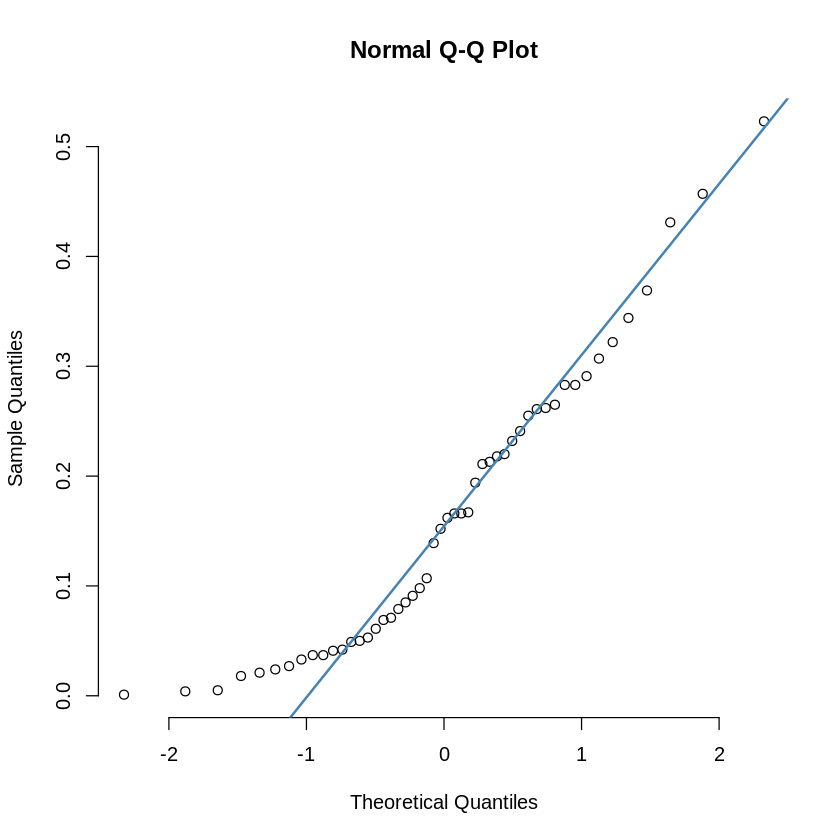

In [7]:
qqnorm(my_vector, pch = 1, frame = FALSE)
qqline(my_vector, col = "steelblue", lwd = 2)

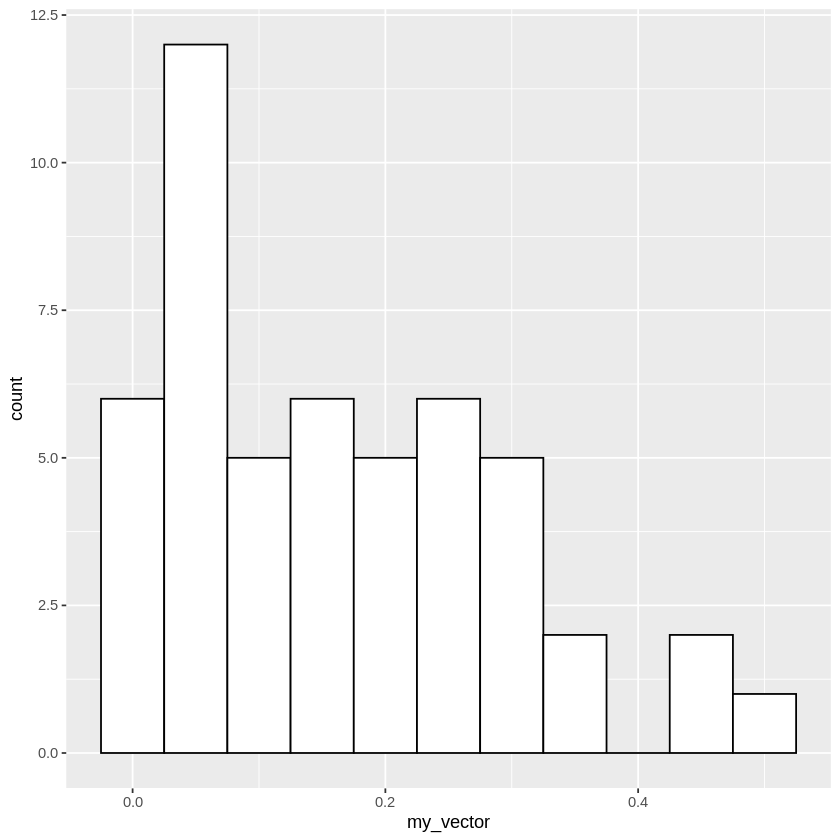

In [4]:
ggplot() + aes(my_vector)+ geom_histogram(binwidth=0.05, colour="black", fill="white")

Нулевая гипотеза Шапиро теста, что распределение нормальное. Альтернативная, что нет. Потому если р значение >0.05, то распределение нормальное. Если р значение <0.05, то распределение не соответствует нормальному

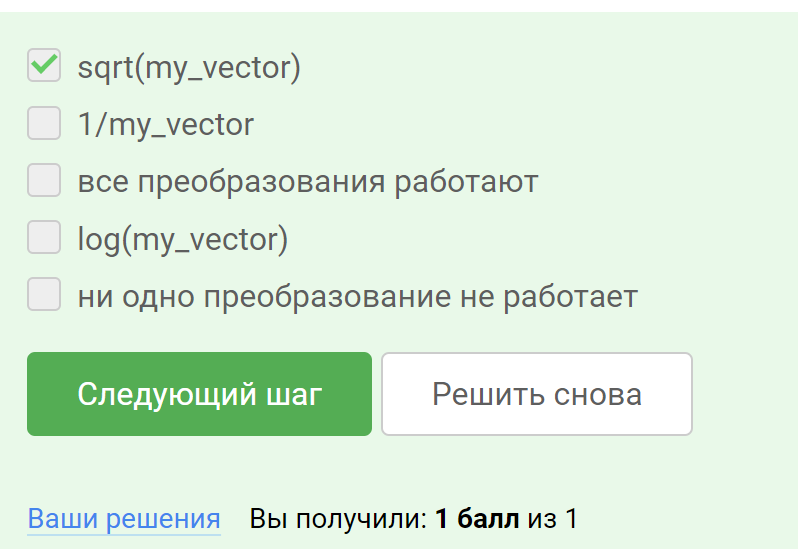

In [9]:
methods <- list(1/my_vector, sqrt(my_vector), log(my_vector))
for (i in methods){
  print(shapiro.test(i)$p.value)
}

[1] 1.703599e-14
[1] 0.2745063
[1] 0.0001195177


# 3_4_7

Функция scale() позволяет совершить стандартизацию вектора, то есть делает его среднее значение равным нулю, а стандартное отклонение - единице (Z-преобразование).

Стандартизованный коэффициент регрессии (β) можно получить, если предикторы и зависимая переменная стандартизованы.

Напишите функцию, которая на вход получает dataframe с двумя количественными переменными, а возвращает стандартизованные коэффициенты для регрессионной модели, в которой первая переменная датафрейма выступает в качестве зависимой, а вторая в качестве независимой.

Примеры работы функции.


> beta.coef(mtcars[,c(1,3)])


-7.036582e-17 -8.475514e-01


> beta.coef(swiss[,c(1,4)])

3.603749e-16 -6.637889e-01

Подсказка:

?scale

In [ ]:
beta.coef <- function (df){
df <- scale (df,center= TRUE, scale=TRUE) #нормируем или масшабируем данные в количественных столбцах. Параметр Center = True
 #означает , что из данных в столбце вычитается среднее. Параметр scale = true означает, что данные из которых уже вычли среднее , далее
 # делятся на среднекв отклонение по этому столбцу
df <- as.data.frame(df) # переводим полученную отмасштабированную матртцу в датафрейм, так как функция Lm требует на вход именно
 # Датафрейм а не матрицу
fit <- lm(df[,1]~df[,2],data=df)$coefficients # в переменную fit помещаем нашу линейную регресионную прямую и выводим коэффициенты
 return(fit)
}

 beta.coef(mtcars[,c(1,3)])

In [10]:
importance_calc <- beta.coef <- function(x){
	x <-scale(x)
	return(lm(x[,1] ~ x[,2])$coefficients)}

# решение от курса.

In [ ]:
beta.coef <- function(x){
  return(lm(scale(x[,1]) ~ scale(x[,2]))$coefficients)
}

# 3_4_9

Напишите функцию normality.test, которая получает на вход dataframe с количественными переменными, проверяет распределения каждой переменной на нормальность с помощью функции shapiro.test. Функция должна возвращать вектор с значениями p - value, полученного в результате проверки на нормальность каждой переменной. Названия элементов вектора должны совпадать с названиями переменных.

Пример работы функции:


> normality.test(mtcars[,1:6])


         mpg          cyl         disp           hp         drat           wt
1.228814e-01 6.058338e-06 2.080657e-02 4.880824e-02 1.100608e-01 9.265499e-02



> normality.test(iris[,-5])


Sepal.Length  Sepal.Width Petal.Length  Petal.Width
1.018116e-02 1.011543e-01 7.412263e-10 1.680465e-08


Опять же, обратите внимание функция должна работать корректно с различным количеством переменных и в независимости от их названий.

Подсказка. Как задать имена элементов вектора:


> my_vector <- c(1, 2, 3, 4)

> names(my_vector) <- c("A", "B", "C", "D")

> my_vector

A B C D
1 2 3 4


* мы подробнее поговорим о функциях семейства apply в следующем курсе - Advanced R, но вы можете изучить справку о apply и sapply. Для решения данной задачи, эти функции могут пригодиться.

In [ ]:
normality.test  <- function(x){
}

In [ ]:
normality.test <- function(x)
{
  res <- vector(length = length(x))
    for(i in 1:length(x))
    {
      res[i] <- shapiro.test(x[[i]])$p.value
    }
 names(res) <- names(x)
 res
}

In [ ]:
normality.test  <- function(x){
	return(sapply(x, FUN =  shapiro.test)['p.value',])}

In [ ]:
normality.test <- function(x) {
  apply(x, 2, function (i) shapiro.test(i)$p.value)
}

In [ ]:
normality.test <- function(x){
  vector = c()
  for (i in 1:length(x[1,])){
    res <- shapiro.test(x[,i])$p.value
    vector <- append(vector,res)
  }
  names(vector) <- names(x[1,])
  return(vector)
}